### 导入数据

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import datetime
import seaborn as sns
sns.set()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [103]:
data=pd.read_csv('./data.csv')
data.head()

,日期,收盘,开盘,高,低,交易量,涨跌幅
0,2021年3月1日,50.39,51.11,51.30,50.03,89.42M,-1.39%
1,2021年2月26日,51.10,53.60,54.45,50.86,132.73M,-6.15%
2,2021年2月25日,54.45,54.50,55.50,53.91,88.62M,1.59%
3,2021年2月24日,53.60,55.85,55.85,52.85,84.43M,-3.51%
4,2021年2月23日,55.55,54.29,56.73,54.20,95.30M,2.49%


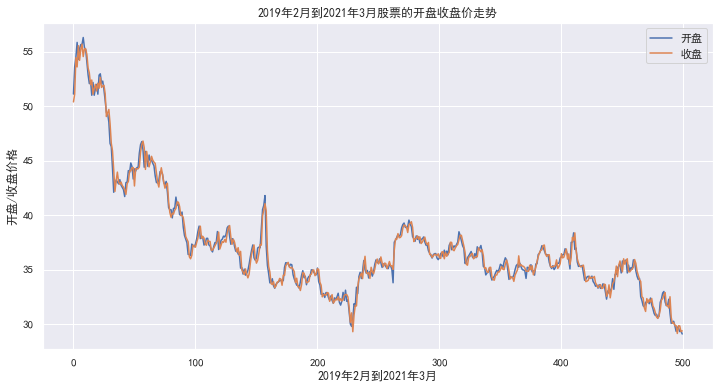

In [104]:
# 股票的开盘收盘价走势：
plt.figure(figsize=(12,6))
plt.plot(data['开盘'],label="开盘")
plt.plot(data['收盘'],label="收盘")
plt.xlabel("2019年2月到2021年3月")
plt.ylabel("开盘/收盘价格")
plt.title("2019年2月到2021年3月股票的开盘收盘价走势")
plt.legend()

### 计算收益率

In [105]:
# #计算每天的收益率
data['收益率'] = data['收盘'].pct_change() 

In [106]:
data 

,日期,收盘,开盘,高,低,交易量,涨跌幅,收益率
0,2021年3月1日,50.39,51.11,51.30,50.03,89.42M,-1.39%,NaN
1,2021年2月26日,51.10,53.60,54.45,50.86,132.73M,-6.15%,0.014090
2,2021年2月25日,54.45,54.50,55.50,53.91,88.62M,1.59%,0.065558
3,2021年2月24日,53.60,55.85,55.85,52.85,84.43M,-3.51%,-0.015611
4,2021年2月23日,55.55,54.29,56.73,54.20,95.30M,2.49%,0.036381
...,...,...,...,...,...,...,...,...
495,2019年2月15日,29.15,29.74,29.85,28.91,49.57M,-2.38%,-0.024104
496,2019年2月14日,29.86,29.65,30.10,29.49,45.24M,0.07%,0.024357
497,2019年2月13日,29.84,29.32,30.04,29.12,53.58M,1.77%,-0.000670
498,2019年2月12日,29.32,29.39,29.58,28.98,39.58M,-0.24%,-0.017426


### 计算VaR

In [107]:
mean_return = data['收益率'].mean()
std = data['收益率'].std()
var1 = mean_return-2.33*std
var5 = mean_return-1.645*std
print("VaR_1:",var1)
print("VaR_5:",var5)

VaR_1: -0.04246426498537438
VaR_5: -0.03025078972554183


### 收益与正态分布

C:\Users\karlieswift\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


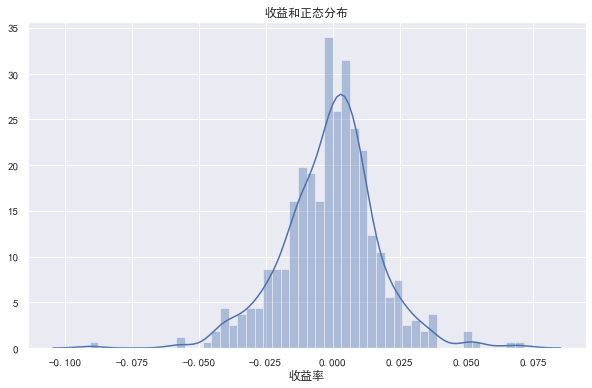

In [108]:
plt.figure(figsize= (10,6))
plt.title("收益和正态分布")
sns.distplot(data["收益率"].dropna(),bins=50)

In [ ]:
# plt.hist(x=np.random.normal(size=(1000)),bins=100)#bins 指定条带bar 的总个数，个数越多，条形带越紧密。

C:\Users\karlieswift\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


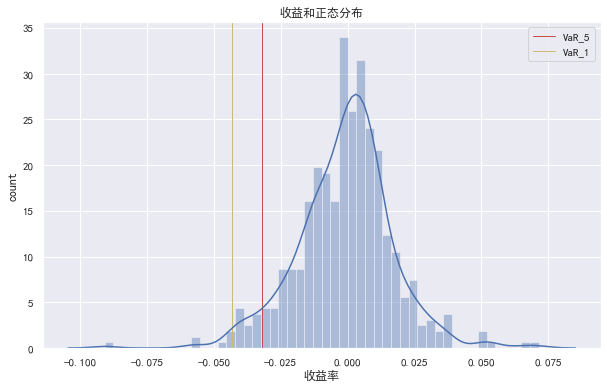

In [110]:
plt.figure(figsize= (10,6))
plt.title("收益和正态分布")
plt.axvline(VaR_5, color='r', linewidth=1,label = 'VaR_5')
plt.axvline(VaR_1, color='y', linewidth=1,label = 'VaR_1')
plt.legend()
plt.xlabel('return')
plt.ylabel('count')
sns.distplot(data["收益率"].dropna(),bins=50)

In [111]:
# ### 参数法计算VaR
# * 参数法定义：先用历史数据计算出每天的收益率均值μ和每天的波动率σ，
# * 99%的VaR(daily)=μ_(1-day)-2.33*σ_(1-day)，2.33是99%VaR单尾检验的Z值。
# * 如果求10天99%的VaR，就要先计算这10天的收益率均值和10天的波动率。
# * 99%的10-dayVaR = μ_(1-day)10-2.33σ_(1-day)*√10
# * 主要代码都跟历史法一样，这里新加计算收益率均值和波动率的方法。
